# Neste notebook vamos avaliar o atraso de grupo

In [1]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
plt.rcParams.update({'font.size': 14})
import IPython.display as ipd # to play signals
import sounddevice as sd
import soundfile as sf
# Os próximos módulos são usados pra criar nosso SLIT
from scipy.signal import butter, lfilter, freqz, chirp, impulse, group_delay

# Vamos criar 2 SLITs

Primeiro vamos criar dois SLITs. Um filtro passa alta e um passa-baixa. Você pode depois mudar a ordem de um dos filtros e sua frequência de corte e, então, observar o que acontece na FRF do SLIT concatenado.

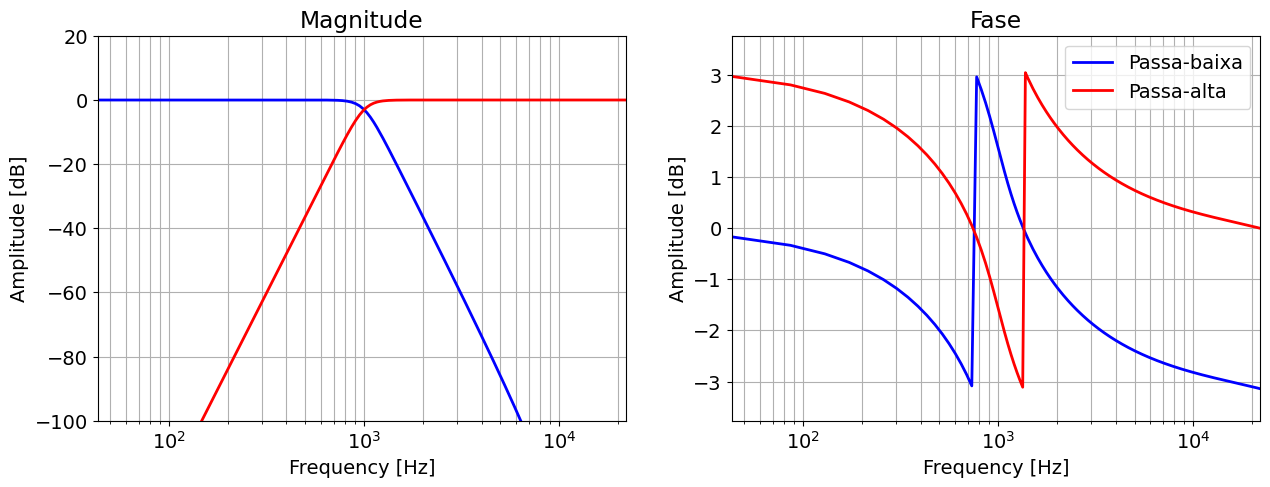

In [2]:
# Variáveis do filtro
order1 = 6
fs = 44100       # sample rate, Hz
cutoff1 = 1000    # desired cutoff frequency of the filter, Hz

# Passa baixa
b1, a1 = butter(order1, 2*cutoff1/fs, btype='low', analog=False)
w, H1 = freqz(b1, a1)

# Passa alta
cutoff2 = 1000
order2 = 6
b2, a2 = butter(order2, 2*cutoff2/fs, btype='high', analog=False)
w, H2 = freqz(b2, a2)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.semilogx(fs*w/(2*np.pi), 20 * np.log10(abs(H1)), 'b', linewidth = 2, label = 'Passa-baixa')
plt.semilogx(fs*w/(2*np.pi), 20 * np.log10(abs(H2)), 'r', linewidth = 2, label = 'Passa-alta')
plt.title('Magnitude')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.ylim((-100, 20))

plt.subplot(1,2,2)
plt.semilogx(fs*w/(2*np.pi), np.angle(H1), 'b', linewidth = 2, label = 'Passa-baixa')
plt.semilogx(fs*w/(2*np.pi), np.angle(H2), 'r', linewidth = 2, label = 'Passa-alta')
plt.legend(loc = 'upper right')
plt.title('Fase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

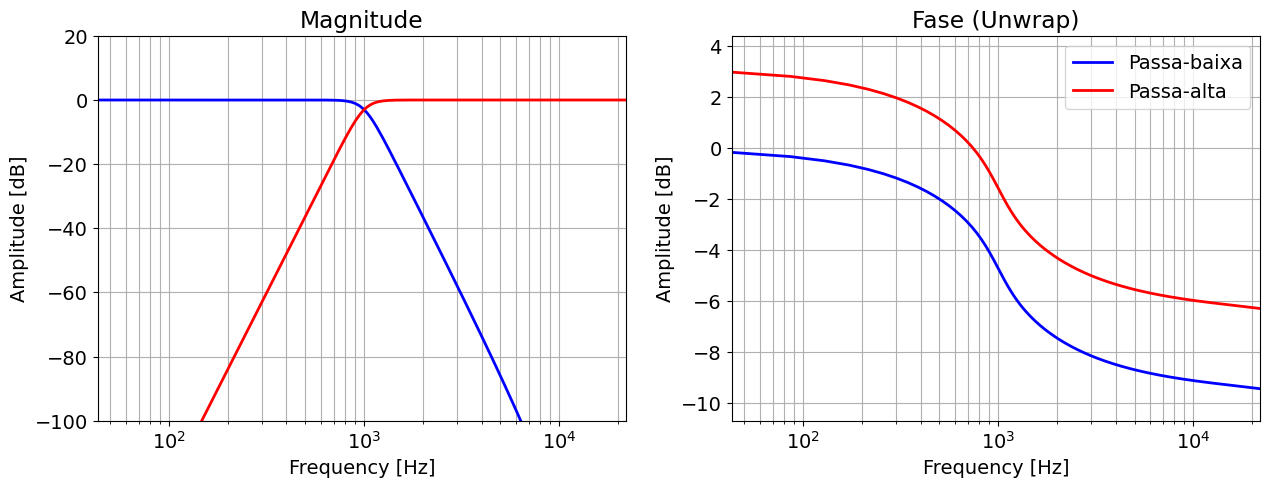

In [3]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.semilogx(fs*w/(2*np.pi), 20 * np.log10(abs(H1)), 'b', linewidth = 2, label = 'Passa-baixa')
plt.semilogx(fs*w/(2*np.pi), 20 * np.log10(abs(H2)), 'r', linewidth = 2, label = 'Passa-alta')
plt.title('Magnitude')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.ylim((-100, 20))

plt.subplot(1,2,2)
plt.semilogx(fs*w/(2*np.pi), np.unwrap(np.angle(H1)), 'b', linewidth = 2, label = 'Passa-baixa')
plt.semilogx(fs*w/(2*np.pi), np.unwrap(np.angle(H2)), 'r', linewidth = 2, label = 'Passa-alta')
plt.legend(loc = 'upper right')
plt.title('Fase (Unwrap)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

C:\Users\Cliente\AppData\Local\Temp\ipykernel_17208\1055031266.py:1: UserWarning: The filter's denominator is extremely small at frequencies [3.117, 3.123, 3.129, 3.135],             around which a singularity may be present
  w, tau_1 = group_delay((b1,a1))
C:\Users\Cliente\AppData\Local\Temp\ipykernel_17208\1055031266.py:2: UserWarning: The filter's denominator is extremely small at frequencies [0.000],             around which a singularity may be present
  w, tau_2 = group_delay((b2,a2))


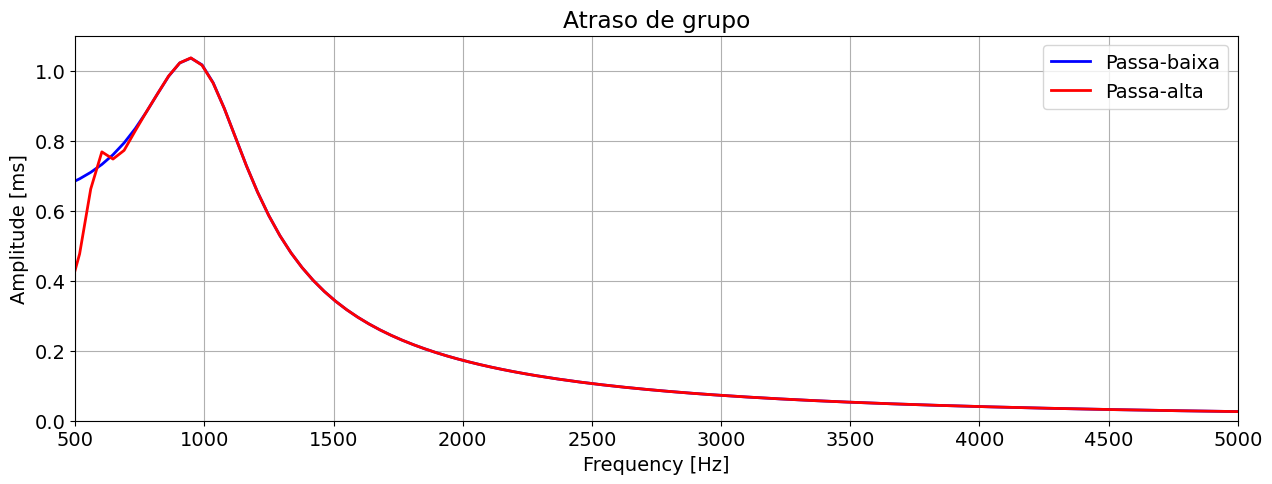

In [4]:
w, tau_1 = group_delay((b1,a1))
w, tau_2 = group_delay((b2,a2))

plt.figure(figsize=(15,5))
plt.plot(fs*w/(2*np.pi), 1000*tau_1/fs, 'b', linewidth = 2, label = 'Passa-baixa')
plt.plot(fs*w/(2*np.pi), 1000*tau_2/fs, 'r', linewidth = 2, label = 'Passa-alta')
plt.legend(loc = 'upper right')
plt.title('Atraso de grupo')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [ms]')
plt.margins(0, 0.1)
plt.xlim((500,5000))
plt.ylim((0,1.1))
plt.grid(which='both', axis='both')
plt.show()

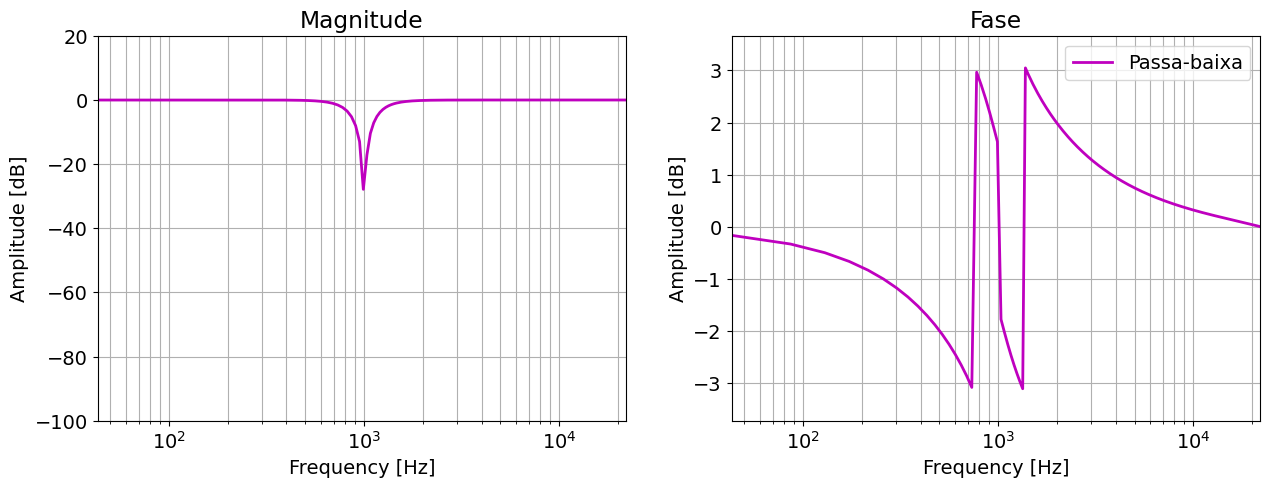

In [6]:
H = H1+H2

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.semilogx(fs*w/(2*np.pi), 20 * np.log10(abs(H)), 'm', linewidth = 2, label = 'Passa-baixa')
plt.title('Magnitude')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.ylim((-100, 20))

plt.subplot(1,2,2)
plt.semilogx(fs*w/(2*np.pi), np.angle(H), 'm', linewidth = 2, label = 'Passa-baixa')
plt.legend(loc = 'upper right')
plt.title('Fase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()